In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
stocks = pd.read_csv('stock_data.csv')
stocks.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [38]:
stocks['Stock'].value_counts()

AAPL    8364
MSFT    7983
TSLA    1858
FB      1381
Name: Stock, dtype: int64

In [39]:
mstf = stocks[['Date','Open']][stocks['Stock']=='MSFT']

In [40]:
mstf

,Date,Open
10222,1986-03-13,0.06720
10223,1986-03-14,0.07533
10224,1986-03-17,0.07533
10225,1986-03-18,0.07533
10226,1986-03-19,0.07533
10227,1986-03-20,0.07533
10228,1986-03-21,0.07533
10229,1986-03-24,0.06720
10230,1986-03-25,0.06720
10231,1986-03-26,0.06720


In [41]:
x=[]
y=[]
for i in range (100,len(mstf)):
    x.append(mstf['Open'].values[i-100:i])
    y.append(mstf['Open'].values[i])
x = np.array(x)
y = np.array(y)

In [42]:
len(x)

7883

In [43]:
x.shape

(7883, 100)

In [44]:
x = np.reshape(x,(x.shape[0],x.shape[1],1))


In [45]:
x.shape

(7883, 100, 1)

In [46]:
from keras.layers import LSTM
import seaborn as sns

from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

In [47]:
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(units=200, return_sequences=True))
model.add(LSTM(units=200, return_sequences=True))
model.add(LSTM(units=200, return_sequences=True))
model.add(LSTM(units=200, return_sequences=True))
model.add(LSTM(units=200))
model.add(Dense(units=1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','accuracy'])
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

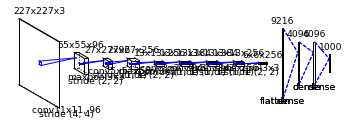

In [33]:
from keras_util import convert_drawer_model
from keras_models import AlexNet
from matplotlib_util import save_model_to_file
# get Keras sequential model
keras_sequential_model = AlexNet.get_model()
model = convert_drawer_model(keras_sequential_model)

# save as svg file
model.save_fig("example.jpeg")

# save as pptx file
#save_model_to_pptx(model, "example.pptx")

# save via matplotlib
save_model_to_file(model, "example.pdf")

AttributeError: 'Model' object has no attribute 'model'

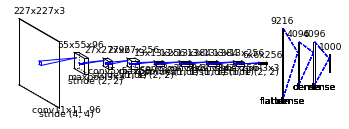

In [23]:
from convnet_drawer import Model, Conv2D, MaxPooling2D, Flatten, Dense
from matplotlib_util import save_model_to_file
save_model_to_file(model, "example12.pdf")

In [48]:
h = model.fit(x,y,epochs = 20 , batch_size=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
7883/7883 [==============================] - 223s 28ms/step - loss: 131.5760 - mae: 6.5027 - accuracy: 1.2686e-04
Epoch 2/20
7883/7883 [==============================] - 225s 29ms/step - loss: 41.7591 - mae: 3.3932 - accuracy: 1.2686e-04
Epoch 3/20
7883/7883 [==============================] - 227s 29ms/step - loss: 19.8245 - mae: 2.4014 - accuracy: 2.5371e-04
Epoch 4/20
7883/7883 [==============================] - 233s 30ms/step - loss: 11.7429 - mae: 1.9607 - accuracy: 1.2686e-04
Epoch 5/20
7883/7883 [==============================] - 233s 30ms/step - loss: 7.0905 - mae: 1.6192 - accuracy: 0.0000e+00
Epoch 6/20
7883/7883 [==============================] - 233s 30ms/step - loss: 4.6125 - mae: 1.3210 - accuracy: 0.0000e+00
Epoch 7/20
7883/7883 [==============================] - 235s 30ms/step - loss: 3.3469 - mae: 1.0574 - accuracy: 3.8057e-04
Epoch 8/20
7883/7883 [==============================] - 236s 30ms/step - loss: 3.0523 

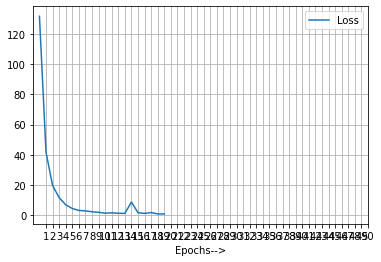

In [49]:
plt.plot(h.history['loss'])
plt.legend(['Loss'])
plt.grid()
plt.xticks(range(1,51))
plt.xlabel('Epochs-->')
plt.show()

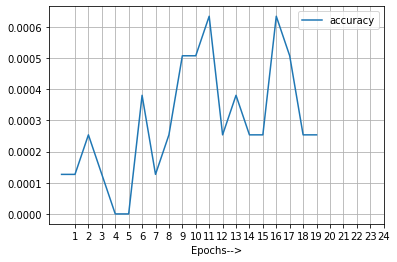

In [51]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.grid()
plt.xticks(range(1,25))
plt.xlabel('Epochs-->')
plt.show()